In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import netCDF4 as nc4
from skimage.transform import resize
import pandas as pd

In [2]:
snotel_frame = pd.read_excel("datasets/SNOTEL_32stations_daily_SierraNevada_1985_2015.xlsx")

In [3]:
snotel_frame.columns

Index(['Station Name', 'Elevation (ft)', 'Latitude', 'Longitude', 'Start Date',
       'End Date', 'Year', 'Day', 'Jan', 'Jan.1', 'Jan.2', 'Jan.3', 'Jan.4',
       'Feb', 'Feb.1', 'Feb.2', 'Feb.3', 'Feb.4', 'Mar', 'Mar.1', 'Mar.2',
       'Mar.3', 'Mar.4', 'Apr', 'Apr.1', 'Apr.2', 'Apr.3', 'Apr.4', 'May',
       'May.1', 'May.2', 'May.3', 'May.4', 'Jun', 'Jun.1', 'Jun.2', 'Jun.3',
       'Jun.4', 'Jul', 'Jul.1', 'Jul.2', 'Jul.3', 'Jul.4', 'Aug', 'Aug.1',
       'Aug.2', 'Aug.3', 'Aug.4', 'Sep', 'Sep.1', 'Sep.2', 'Sep.3', 'Sep.4',
       'Oct', 'Oct.1', 'Oct.2', 'Oct.3', 'Oct.4', 'Nov', 'Nov.1', 'Nov.2',
       'Nov.3', 'Nov.4', 'Dec', 'Dec.1', 'Dec.2', 'Dec.3', 'Dec.4'],
      dtype='object')

In [4]:
name_list = set(snotel_frame["Station Name"][2:])
month_list = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [5]:
snotel_dict = {}
for station_name in name_list:
    print(station_name)
    this_name_frame = snotel_frame.loc[snotel_frame['Station Name'] == station_name]
    snotel_dict[station_name] = []
    for year_num in range(2003, 2014):
        for month in month_list:
            snotel_dict[station_name] += list(this_name_frame.loc[this_name_frame['Year'] == str(year_num)][month])
            #print(station_name, year_num, month)
            #print(len(list(this_name_frame.loc[this_name_frame['Year'] == str(year_num)][month])))

Monitor Pass
Ward Creek #3
Rubicon #2
Independence Creek
Heavenly Valley
Leavitt Meadows
Fallen Leaf
Blue Lakes
Poison Flat
Squaw Valley G.C.
Carson Pass
Lobdell Lake
Summit Meadow
Truckee #2
Mt Rose Ski Area
Hagans Meadow
Big Meadow
Sonora Pass
Burnside Lake
Ebbetts Pass
Horse Meadow
Leavitt Lake
Virginia Lakes Ridge
Css Lab
Echo Peak
Marlette Lake
Little Valley
Forestdale Creek
Spratt Creek
Independence Lake
Tahoe City Cross
Independence Camp


In [6]:
tempfile = open('datasets/print.LivnehtoSNOTELindex.out', 'r')
tempfile  =tempfile.readlines()
tempfile = [i.split(" ") for i in tempfile]
tempfile = sum(tempfile, [])
tempfile = np.array(tempfile)
grid_size = 312
index_list = tempfile[np.where(np.array(tempfile) == "Index")[0] + 2]
indexlist = index_list.astype(int)
index_list = indexlist.reshape((-1,2))
index_list = np.round(index_list*(grid_size/312)).astype(int)
station_list = tempfile[np.where(np.array(tempfile) == "Station")[0] + 2]
index_dict = {i[0]:i[1] for i in zip(station_list, index_list)}

In [7]:
def remove_snotel_nan(snotel_array):
    return snotel_array[np.where(snotel_array != 'nan')].astype(int)

In [8]:
for key in snotel_dict.keys():
    snotel_dict[key] = (remove_snotel_nan(np.array(snotel_dict[key])))

In [9]:
for i in snotel_dict.keys():
    print(i, np.sum(np.array(snotel_dict[i]) != 'nan'))

Monitor Pass 1
Ward Creek #3 1
Rubicon #2 1
Independence Creek 1
Heavenly Valley 1
Leavitt Meadows 1
Fallen Leaf 1
Blue Lakes 1
Poison Flat 1
Squaw Valley G.C. 1
Carson Pass 1
Lobdell Lake 1
Summit Meadow 1
Truckee #2 1
Mt Rose Ski Area 1
Hagans Meadow 1
Big Meadow 1
Sonora Pass 1
Burnside Lake 1
Ebbetts Pass 1
Horse Meadow 1
Leavitt Lake 1
Virginia Lakes Ridge 1
Css Lab 1
Echo Peak 1
Marlette Lake 1
Little Valley 1
Forestdale Creek 1
Spratt Creek 1
Independence Lake 1
Tahoe City Cross 1
Independence Camp 1


/home/ashray/anaconda3/envs/py37torch1/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [10]:
temp = list(snotel_dict.keys())
temp.sort()
print(temp)

['Big Meadow', 'Blue Lakes', 'Burnside Lake', 'Carson Pass', 'Css Lab', 'Ebbetts Pass', 'Echo Peak', 'Fallen Leaf', 'Forestdale Creek', 'Hagans Meadow', 'Heavenly Valley', 'Horse Meadow', 'Independence Camp', 'Independence Creek', 'Independence Lake', 'Leavitt Lake', 'Leavitt Meadows', 'Little Valley', 'Lobdell Lake', 'Marlette Lake', 'Monitor Pass', 'Mt Rose Ski Area', 'Poison Flat', 'Rubicon #2', 'Sonora Pass', 'Spratt Creek', 'Squaw Valley G.C.', 'Summit Meadow', 'Tahoe City Cross', 'Truckee #2', 'Virginia Lakes Ridge', 'Ward Creek #3']


In [11]:
better_index = {i[0]:i[1] for i in zip(temp, list(index_dict.values()))}
better_index

{'Big Meadow': array([175, 162]),
 'Blue Lakes': array([147, 162]),
 'Burnside Lake': array([151, 163]),
 'Carson Pass': array([150, 160]),
 'Css Lab': array([170, 148]),
 'Ebbetts Pass': array([146, 166]),
 'Echo Peak': array([155, 157]),
 'Fallen Leaf': array([158, 158]),
 'Forestdale Creek': array([150, 161]),
 'Hagans Meadow': array([155, 162]),
 'Heavenly Valley': array([158, 163]),
 'Horse Meadow': array([155, 164]),
 'Independence Camp': array([174, 151]),
 'Independence Creek': array([176, 151]),
 'Independence Lake': array([174, 150]),
 'Leavitt Lake': array([137, 172]),
 'Leavitt Meadows': array([138, 174]),
 'Little Valley': array([168, 164]),
 'Lobdell Lake': array([142, 180]),
 'Marlette Lake': array([165, 163]),
 'Monitor Pass': array([149, 173]),
 'Mt Rose Ski Area': array([170, 163]),
 'Poison Flat': array([144, 172]),
 'Rubicon #2': array([160, 156]),
 'Sonora Pass': array([138, 173]),
 'Spratt Creek': array([149, 166]),
 'Squaw Valley G.C.': array([166, 151]),
 'Summi

In [14]:
snotel_dict['Big Meadow'].shape

(4018,)

In [15]:
final_dict = {i:(better_index[i], snotel_dict[i]) for i in snotel_dict.keys()}

In [16]:
np.savez("snotel_values_and_index.npz", list(final_dict.keys()), list(final_dict.values()))

In [17]:
final_dict

{'Monitor Pass': (array([149, 173]),
  array([300, 302, 302, ...,  51,  51,  51])),
 'Ward Creek #3': (array([164, 153]),
  array([485, 490, 490, ...,  81,  81,  81])),
 'Rubicon #2': (array([160, 156]), array([312, 318, 323, ...,  46,  46,  46])),
 'Independence Creek': (array([176, 151]),
  array([206, 206, 203, ...,  13,  13,  13])),
 'Heavenly Valley': (array([158, 163]),
  array([404, 409, 409, ...,  74,  74,  74])),
 'Leavitt Meadows': (array([138, 174]),
  array([211, 211, 211, ...,  38,  38,  38])),
 'Fallen Leaf': (array([158, 158]),
  array([193, 193, 193, ...,  43,  43,  43])),
 'Blue Lakes': (array([147, 162]), array([404, 404, 404, ...,  74,  74,  74])),
 'Poison Flat': (array([144, 172]),
  array([340, 340, 340, ...,  41,  41,  41])),
 'Squaw Valley G.C.': (array([166, 151]),
  array([897, 942, 942, ..., 112, 112, 112])),
 'Carson Pass': (array([150, 160]),
  array([925, 925, 925, ...,  97,  97,  97])),
 'Lobdell Lake': (array([142, 180]),
  array([328, 328, 328, ...,  20

In [18]:
index_dict

{'Big_Meadow\n': array([175, 162]),
 'Blue_Lakes\n': array([147, 162]),
 'Burnside_Lake\n': array([151, 163]),
 'Carson_Pass\n': array([150, 160]),
 'Css_Lab\n': array([170, 148]),
 'Ebbetts_Pass\n': array([146, 166]),
 'Echo_Peak\n': array([155, 157]),
 'Fallen_Leaf\n': array([158, 158]),
 'Forestdale_Creek\n': array([150, 161]),
 'Hagans_Meadow\n': array([155, 162]),
 'Heavenly_Valley\n': array([158, 163]),
 'Horse_Meadow\n': array([155, 164]),
 'Independence_Camp\n': array([174, 151]),
 'Independence_Creek\n': array([176, 151]),
 'Independence_Lake\n': array([174, 150]),
 'Leavitt_Lake\n': array([137, 172]),
 'Leavitt_Meadows\n': array([138, 174]),
 'Little_Valley\n': array([168, 164]),
 'Lobdell_Lake\n': array([142, 180]),
 'Marlette_Lake\n': array([165, 163]),
 'Monitor_Pass\n': array([149, 173]),
 'Mt_Rose_Ski_Area\n': array([170, 163]),
 'Poison_Flat\n': array([144, 172]),
 'Rubicon_2\n': array([160, 156]),
 'Sonora_Pass\n': array([138, 173]),
 'Spratt_Creek\n': array([149, 166]

In [41]:
def remove_snotel_nan(snotel_array):
    return snotel_array[np.where(snotel_array != 'nan')].astype(int)

In [42]:
snotel_dict.keys()

dict_keys(['Poison Flat', 'Css Lab', 'Tahoe City Cross', 'Mt Rose Ski Area', 'Forestdale Creek', 'Carson Pass', 'Sonora Pass', 'Independence Camp', 'Monitor Pass', 'Blue Lakes', 'Marlette Lake', 'Summit Meadow', 'Hagans Meadow', 'Leavitt Meadows', 'Burnside Lake', 'Squaw Valley G.C.', 'Horse Meadow', 'Spratt Creek', 'Truckee #2', 'Independence Creek', 'Fallen Leaf', 'Ward Creek #3', 'Ebbetts Pass', 'Little Valley', 'Virginia Lakes Ridge', 'Rubicon #2', 'Big Meadow', 'Echo Peak', 'Heavenly Valley', 'Leavitt Lake', 'Independence Lake', 'Lobdell Lake'])

In [32]:
for key in snotel_dict.keys():
    snotel_dict[key] = (remove_snotel_nan(np.array(snotel_dict[key])))

In [199]:
snotel_dict["Little Valley"]

(997,)

In [202]:
np.savez("snotel_data.npz", snotel_dict)

In [203]:
!ls

 2week.ipynb					 OceanMask.ipynb
 augmented_cyclegan				 OceanMask.npy
 backup_py2.zip					'Parse Snotel Data.ipynb'
 conditional_gan				 README.md
 datasets					 saved_percent_masks.npy
 height_array.npy				 snotel_data.npz
 HMap.ipynb					 SWEDataCheck.ipynb
'implementing interactive saliency maps.ipynb'


In [147]:
remove_snotel_nan(np.array(snotel_dict["Echo Peak"]))

array([686, 688, 693, ..., 102, 102, 102])

In [251]:
snotel_dict['Mt Rose Ski Area']

array([658, 663, 663, ...,  58,  58,  58])

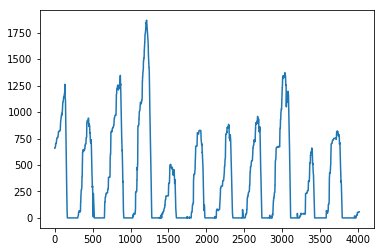

In [252]:
plt.plot(np.array(snotel_dict["Mt Rose Ski Area"]))

In [151]:
total_data = nc4.Dataset('datasets/Livneh.LndVar.CA.4km.2003_2013.nc')

In [152]:
total_SWE_data = np.array(total_data.variables["SWE"])

In [255]:
total_SWE_data.shape

(4018, 321, 321)

In [153]:
selected_liv_data = total_SWE_data[:, 153, 164]

In [154]:
normalized_lons = np.abs(np.array(total_data.variables['lon']) - -120.21865)

In [155]:
np.where(normalized_lons == min(normalized_lons))

(array([153]),)

In [156]:
normalized_lats = np.abs(np.array(total_data.variables['lat']) - 39.13545)

In [157]:
np.where(normalized_lats == min(normalized_lats))

(array([164]),)

In [175]:
t = np.arange(0, 4018)

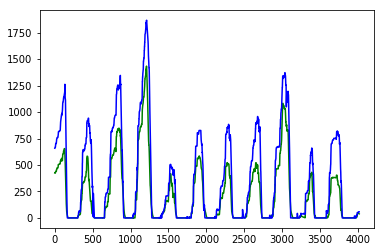

In [254]:
selected_liv_data = total_SWE_data[:, 170, 162]
plt.plot(t, selected_liv_data, 'g')
plt.plot(t, snotel_dict["Mt Rose Ski Area"], 'b')

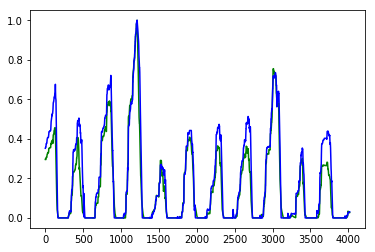

In [258]:
selected_liv_data = total_SWE_data[:, 170, 162]
plt.plot(t, selected_liv_data/np.max(selected_liv_data), 'g')
plt.plot(t, snotel_dict["Mt Rose Ski Area"]/np.max(snotel_dict["Mt Rose Ski Area"]), 'b')

In [12]:
tempfile = open('datasets/print.LivnehtoSNOTELindex.out', 'r')
tempfile  =tempfile.readlines()
tempfile = [i.split(" ") for i in tempfile]
tempfile = sum(tempfile, [])
tempfile = np.array(tempfile)
grid_size = 312
index_list = tempfile[np.where(np.array(tempfile) == "Index")[0] + 2]
indexlist = index_list.astype(int)
index_list = indexlist.reshape((-1,2))
index_list = np.round(index_list*(grid_size/312)).astype(int)
station_list = tempfile[np.where(np.array(tempfile) == "Station")[0] + 2]
index_dict = {i[0]:i[1] for i in zip(station_list, index_list)}

In [13]:
station_list = tempfile[np.where(np.array(tempfile) == "Station")[0] + 2]


In [14]:
index_dict = {i[0]:i[1] for i in zip(station_list, index_list)}

In [15]:
index_dict

{'Big_Meadow\n': array([175, 162]),
 'Blue_Lakes\n': array([147, 162]),
 'Burnside_Lake\n': array([151, 163]),
 'Carson_Pass\n': array([150, 160]),
 'Css_Lab\n': array([170, 148]),
 'Ebbetts_Pass\n': array([146, 166]),
 'Echo_Peak\n': array([155, 157]),
 'Fallen_Leaf\n': array([158, 158]),
 'Forestdale_Creek\n': array([150, 161]),
 'Hagans_Meadow\n': array([155, 162]),
 'Heavenly_Valley\n': array([158, 163]),
 'Horse_Meadow\n': array([155, 164]),
 'Independence_Camp\n': array([174, 151]),
 'Independence_Creek\n': array([176, 151]),
 'Independence_Lake\n': array([174, 150]),
 'Leavitt_Lake\n': array([137, 172]),
 'Leavitt_Meadows\n': array([138, 174]),
 'Little_Valley\n': array([168, 164]),
 'Lobdell_Lake\n': array([142, 180]),
 'Marlette_Lake\n': array([165, 163]),
 'Monitor_Pass\n': array([149, 173]),
 'Mt_Rose_Ski_Area\n': array([170, 163]),
 'Poison_Flat\n': array([144, 172]),
 'Rubicon_2\n': array([160, 156]),
 'Sonora_Pass\n': array([138, 173]),
 'Spratt_Creek\n': array([149, 166]

Take all 32 snotel sites. Make 256x256x4018 array containing snotel values per day. Split train test. Save as sparse array.

In [15]:
snotel_data

array([2.1920695, 0.       , 0.       , ..., 0.       , 0.       ,
       0.       ], dtype=float32)

In [16]:
selected_liv_data

array([212.03815 , 212.13559 , 212.2724  , ...,  19.2628  ,  18.706749,
        17.489649], dtype=float32)

In [17]:
t = np.arange(0, 4018)
t.shape

(4018,)

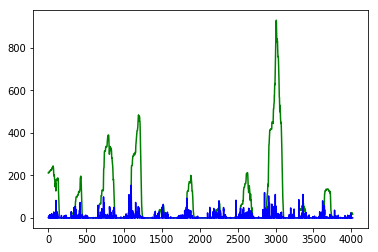

In [22]:
selected_liv_data = total_SWE_data[:, 153, 164]
plt.plot(t, selected_liv_data, 'g')
plt.plot(t, snotel_data, 'b')

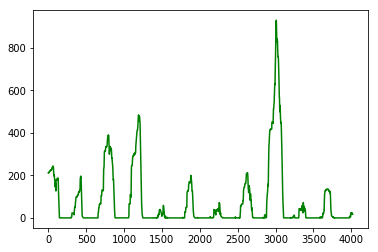

In [21]:
plt.plot(t, selected_liv_data, 'g')


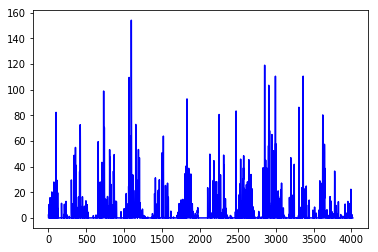

In [20]:
plt.plot(t, snotel_data, 'b')

In [8]:
tempfile = open('datasets/print.LivnehtoSNOTELindex.out', 'r')

In [9]:
tempfile  =tempfile.readlines()

In [10]:
tempfile = [i.split(" ") for i in tempfile]

In [11]:
tempfile = sum(tempfile, [])

In [12]:
tempfile = sum(tempfile, [])
tempfile = np.array(tempfile)

In [13]:
tempfile = sum(tempfile, [])
tempfile = np.array(tempfile)
grid_size = 64

In [14]:
tempfile = sum(tempfile, [])
tempfile = np.array(tempfile)
grid_size = 64
index_list = tempfile[np.where(np.array(tempfile) == "Index")[0] + 2]
indexlist = index_list.astype(int)
index_list = indexlist.reshape((-1,2))
index_list = np.round(index_list*(grid_size/312)).astype(int)
index_list

array([[36, 33],
       [30, 33],
       [31, 33],
       [31, 33],
       [35, 30],
       [30, 34],
       [32, 32],
       [32, 32],
       [31, 33],
       [32, 33],
       [32, 33],
       [32, 34],
       [36, 31],
       [36, 31],
       [36, 31],
       [28, 35],
       [28, 36],
       [34, 34],
       [29, 37],
       [34, 33],
       [31, 35],
       [35, 33],
       [30, 35],
       [33, 32],
       [28, 35],
       [31, 34],
       [34, 31],
       [29, 36],
       [34, 32],
       [35, 32],
       [27, 38],
       [34, 31]])

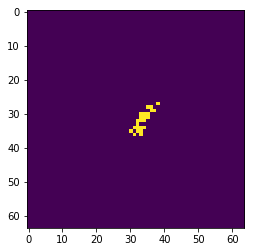

In [15]:
A = np.zeros((64, 64))
for i in index_list:
    A[i[0], i[1]] = 1
plt.imshow(A)

In [16]:
temp1 = nc4.Dataset(nc_files[0],'r')
temp1

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    creation_date: Fri Feb  8 15:00:14 PST 2019
    Conventions: None
    source_file: 
    title: AR MASK - 1549666812
    dimensions(sizes): time(4018)
    variables(dimensions): float32 Heavenly_Valley_POINT_38_92431to119_91641_4km_Livneh(time), float64 time(time)
    groups: 

In [17]:
station_list = tempfile[np.where(np.array(tempfile) == "Station")[0] + 2]
station_list

array(['Big_Meadow\n', 'Blue_Lakes\n', 'Burnside_Lake\n', 'Carson_Pass\n',
       'Css_Lab\n', 'Ebbetts_Pass\n', 'Echo_Peak\n', 'Fallen_Leaf\n',
       'Forestdale_Creek\n', 'Hagans_Meadow\n', 'Heavenly_Valley\n',
       'Horse_Meadow\n', 'Independence_Camp\n', 'Independence_Creek\n',
       'Independence_Lake\n', 'Leavitt_Lake\n', 'Leavitt_Meadows\n',
       'Little_Valley\n', 'Lobdell_Lake\n', 'Marlette_Lake\n',
       'Monitor_Pass\n', 'Mt_Rose_Ski_Area\n', 'Poison_Flat\n',
       'Rubicon_2\n', 'Sonora_Pass\n', 'Spratt_Creek\n',
       'Squaw_Valley_G_C_\n', 'Summit_Meadow\n', 'Tahoe_City_Cross\n',
       'Truckee_2\n', 'Virginia_Lakes_Ridge\n', 'Ward_Creek_3\n'],
      dtype='<U62')

In [18]:
new_file_list = []
for station_name in station_list:
    for file_name in nc_files:
        if station_name[0:-1] in file_name:
            new_file_list.append(file_name)

In [19]:
new_file_list

['datasets/snotel/Big_Meadow_from_Livneh4km_at_39_455_lat_to_119_9422_lon.nc',
 'datasets/snotel/Blue_Lakes_from_Livneh4km_at_38_608_lat_to_119_92437_lon.nc',
 'datasets/snotel/Burnside_Lake_from_Livneh4km_at_38_71943_lat_to_119_8942_lon.nc',
 'datasets/snotel/Carson_Pass_from_Livneh4km_at_38_6927_lat_to_120_0022_lon.nc',
 'datasets/snotel/Css_Lab_from_Livneh4km_at_39_32565_lat_to_120_36807_lon.nc',
 'datasets/snotel/Ebbetts_Pass_from_Livneh4km_at_38_5497_lat_to_119_80468_lon.nc',
 'datasets/snotel/Echo_Peak_from_Livneh4km_at_38_849_lat_to_120_0795_lon.nc',
 'datasets/snotel/Fallen_Leaf_from_Livneh4km_at_38_93403_lat_to_120_0545_lon.nc',
 'datasets/snotel/Forestdale_Creek_from_Livneh4km_at_38_68245_lat_to_119_9597_lon.nc',
 'datasets/snotel/Hagans_Meadow_from_Livneh4km_at_38_8519_lat_to_119_9374_lon.nc',
 'datasets/snotel/Heavenly_Valley_from_Livneh4km_at_38_92431_lat_to_119_91641_lon.nc',
 'datasets/snotel/Horse_Meadow_from_Livneh4km_at_38_83652_lat_to_119_88732_lon.nc',
 'datasets/sn

In [20]:
snotel_array = np.zeros((4018, 64, 64))
index_count_dict = {}
for index, name in enumerate(new_file_list):
    
    temp1 = nc4.Dataset(name,'r')
    if tuple(index_list[index]) in index_count_dict:
        index_count_dict[tuple(index_list[index])] += 1
    else:
        index_count_dict[tuple(index_list[index])] = 1
    snotel_array[:, index_list[index][0], index_list[index][1]] += np.array(temp1.variables[list(temp1.variables.keys())[0]])
    


In [21]:
for item in index_count_dict:
    snotel_array[:, np.array(item)[0], np.array(item)[1]] = snotel_array[:, np.array(item)[0], np.array(item)[1]] / index_count_dict[item]


In [22]:
snotel_array.sum()

204087.64643556732

In [23]:
snotel_array.shape

(4018, 64, 64)

In [24]:
frac_train = 0.8
idx_train = int(4018 * frac_train)
trainA = snotel_array[:idx_train]
testA = snotel_array[idx_train:]

In [25]:
output_dir = "datasets/livneh/"

np.savez_compressed(output_dir + "trainSnotel.npz", data=trainA, variables=['Snotel'])
np.savez_compressed(output_dir + "testSnotel.npz", data=testA, variables=['Snotel'])


In [26]:
testA.shape

(804, 64, 64)

In [27]:
np.array(temp1.variables['Ward_Creek_3_POINT_39_13545to120_21865_4km_Livneh'])

array([2.1920695, 0.       , 0.       , ..., 0.       , 0.       ,
       0.       ], dtype=float32)

In [28]:
np.min(np.array(temp1.variables['Ward_Creek_3_POINT_39_13545to120_21865_4km_Livneh']))

0.0

In [29]:
np.max(np.array(temp1.variables['Ward_Creek_3_POINT_39_13545to120_21865_4km_Livneh']))

154.0326

In [30]:
swe_data = np.load('datasets/livneh/trainB.npz')

In [31]:
trainDat = swe_data['data']

In [32]:
trainDat = np.nan_to_num(trainDat)

In [33]:
trainDat.shape

(3214, 64, 64, 1)

In [34]:
snotel_array = -1 + 2 * (snotel_array) / np.max(snotel_array)

In [35]:
np.min(snotel_array)

-1.0

In [36]:
np.max(snotel_array)

1.0

In [37]:
np.max(trainDat)

2580.133432000898

In [38]:
trainDat.shape

(3214, 64, 64, 1)

In [39]:
trainA.shape

(3214, 64, 64)

In [40]:
(trainA[500,:,:] != 0).sum()

0

In [41]:
np.max(trainA)

154.96300506591797

In [42]:
np.max(trainDat)

2580.133432000898

In [43]:
321 / 64

5.015625

In [44]:
154 * 5

770